# Hypothesis Testing
## Data Analytics Activity W8

*Juan Rico G. Asuncion* | *B37* | *01/20/2024*

### Instructions

Using the given dataset provided, perform the following tasks using the given libraries specified below.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Details

A telecommunications network provided a sample of their customer data containing details whether the person churned i.e. stopped using their subscription services or not. Subscription-related information is provided as well as the demographics for each customer. You are advised to perform statistical tests to provide interesting results.

In [2]:
telecom_data = pd.read_csv('telecom_users.csv')

In [3]:
telecom_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [4]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5986 non-null   object 
 1   gender            5986 non-null   object 
 2   SeniorCitizen     5986 non-null   int64  
 3   Partner           5986 non-null   object 
 4   Dependents        5986 non-null   object 
 5   tenure            5986 non-null   int64  
 6   PhoneService      5986 non-null   object 
 7   MultipleLines     5986 non-null   object 
 8   InternetService   5986 non-null   object 
 9   OnlineSecurity    5986 non-null   object 
 10  OnlineBackup      5986 non-null   object 
 11  DeviceProtection  5986 non-null   object 
 12  TechSupport       5986 non-null   object 
 13  StreamingTV       5986 non-null   object 
 14  StreamingMovies   5986 non-null   object 
 15  Contract          5986 non-null   object 
 16  PaperlessBilling  5986 non-null   object 


### Rubrics (For each item)
- Null and Alternative Hypothesis Declaration (5 pts)
- Results Accuracy (5 pts)
- Code Execution, Formatting, and Cleanliness (5 pts)
- Visualization (5 pts)
- Conclusion (5 pts)

Note: For all items, the number of simulations should be at least `10000`

#### 1. Investigate a claim where Senior Citizens with Technical Support in their subscription has an average total charge of `5300` (USD)

*Note: Exclude the data points containing `NA` values in the test*

$H_0:$The average total charge for Senior Citizens with Technical Support is equal to 5300 USD.  
$H_1:$The average total charge for Senior Citizens with Technical Support is not equal to 5300 USD.  
Reject $H_0$ if p-value is less than $\alpha = 0.05$

In [5]:
seniorWithTech = telecom_data[(telecom_data['SeniorCitizen'] == 1) & (telecom_data['TechSupport'] == 'Yes')]
totalCharge = np.array([float(i) for i in seniorWithTech['TotalCharges'].tolist()])
bootstrapMeans = []

for i in range(10000):
    data = np.random.choice(totalCharge, 219, replace = True)
    bootstrapMeans = np.append(bootstrapMeans, np.mean(data))

pValue = sum(bootstrapMeans == 5300) / 10000
pValue

0.0

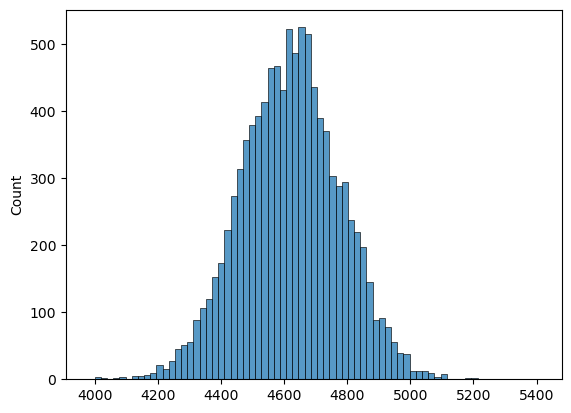

In [6]:
ax = sns.histplot(bootstrapMeans)

Since the obtained p-value from the bootstrap is 0.0, which is less than the $\alpha = 0.05$, we can reject the $H_0$ and conclude that the average total charge for Senior Citizens with Technical Support is not equal to 5300 USD.  

#### 2. Verify whether customers that don't use monthly subscription contracts have an estimate monthly charge of `23` (USD)

$H_0:$The average total charge for Senior Citizens with Technical Support is equal to 5300 USD.  
$H_1:$The average total charge for Senior Citizens with Technical Support is not equal to 5300 USD.  
Reject $H_0$ if p-value is less than $\alpha = 0.05$

In [7]:
yearlyContract = np.array([float(i) for i in telecom_data[telecom_data['Contract'] != 'Month-to-month']['MonthlyCharges']])
bootstrapMean = []

for i in range(10000):
    data = np.random.choice(yearlyContract, len(yearlyContract), replace = True)
    bootstrapMean = np.append(bootstrapMean, np.mean(data))
    
pValue = sum(bootstrapMean == 23)/10000
pValue

0.0

<Axes: ylabel='Count'>

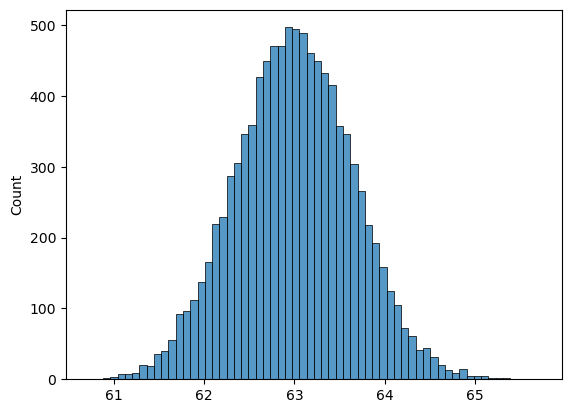

In [8]:
sns.histplot(bootstrapMean)

Since the p-value obtained from bootstrapping is 0.0 in which is less than $\alpha = 0.05$, we reject the $H_0$ and conclude that the average total chargefor Senior Citizens with Technical Support is not equal to 5300 USD.

#### 3. Check whether there is a difference in the total charges between males who churned and not churned

*Note: Exclude the data points containing `NA` values in the test*

$H_0$: There is no significant difference in total charges between males who churned and did not churn.  
$H_1$: There is a significant difference in total charges between males who churned and did not churn.  
Reject $H_0$ if p-value is less than $\alpha = 0.05$

In [9]:
df = telecom_data[(telecom_data['TotalCharges'] != ' ') & (telecom_data['gender'] == 'Male')]
yes = [float(i) for i in df[df['Churn'] == 'Yes']['TotalCharges'].tolist()]
no = [float(i) for i in df[df['Churn'] == 'No']['TotalCharges'].tolist()]
totalCharges = yes + no
bootstrapVar = []

for i in range(10000):
    churned = np.random.choice(totalCharges, len(yes), replace = True)
    notChurned = np.random.choice(totalCharges, len(no), replace = True)
    means = [churned.mean(), notChurned.mean()]
    variance = np.var(means)
    bootstrapVar.append(variance)

observedVar = np.var([np.mean(yes), np.mean(no)])
pValue = sum(bootstrapVar > observedVar)/10000
pValue

0.0

[Text(0.5, 0, 'Variance'),
 Text(0.5, 1.0, 'Variances of total charges\n beween males who churned and not churned')]

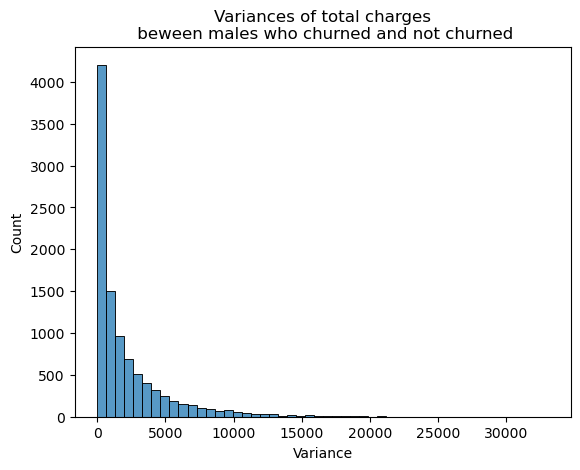

In [10]:
ax = sns.histplot(bootstrapVar, bins = 50)
ax.set(xlabel = 'Variance', title = 'Variances of total charges\n beween males who churned and not churned')

Since the obtained p-value from bootstrapping is 0.0, which is less than the $\alpha = 0.05$, we can reject the $H_0$ and conclude that there is a significant difference in the total charges between males who churned and not churned.

#### 4. Using the given dataset, provide a pair of samples that shows significant difference in their means of monthly charges

In this task, you have to provide a subset sample from the dataset that characterizes their difference of means in monthly charges.

For example: Difference of Monthly charges between Senior Citizens who has an internet service subscription and who hasn't.

*Note: Previous items (1) (2) (3) and the given example above cannot be reused (if applicable)*

$H_0$: There is no significant difference in monthly charges between senior citizens who are with and without partners.  
$H_1$: There is a significant difference in monthly charges between senior citizens who are with and without partners.  
Reject null hypothesis if p-value is less than $\alpha = 0.05$

In [11]:
df = telecom_data[telecom_data['SeniorCitizen'] == 1]
yesPartner = [float(i) for i in df[df['Partner'] == 'Yes']['MonthlyCharges'].tolist()]
noPartner = [float(i) for i in df[df['Partner'] == 'No']['MonthlyCharges'].tolist()]
partner = yesPartner + noPartner
bootstrapVar = []

for i in range(10000):
    a = np.random.choice(partner, len(yesPartner), replace = True)
    b = np.random.choice(partner, len(noPartner), replace = True)
    bootstrapVar = np.append(bootstrapVar, np.var([np.mean(a), np.mean(b)]))

observedVar = np.var([np.mean(yesPartner), np.mean(noPartner)])
pValue = sum(bootstrapVar > observedVar) / 10000
pValue

0.0

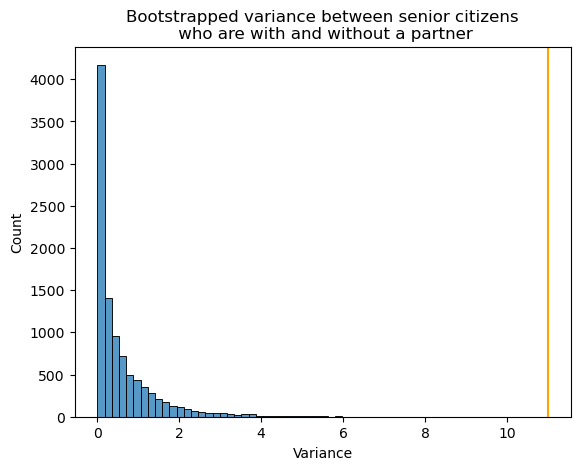

In [12]:
ax = sns.histplot(bootstrapVar, bins = 50)
ax.set(xlabel = 'Variance', title = 'Bootstrapped variance between senior citizens\n who are with and without a partner')
ax.axvline(x = observedVar, color = 'orange')

Since the p-value is 0.0 which is less than the $\alpha$ of 0.05, we reject the $H_0$ and conclude that there is significant difference between the monthly charges of those who has a partner and those who don't.